In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [2]:
#import data
raw_df = pd.read_csv('../raw_data/data/listings.csv')

In [3]:
#view head of data with all columns showing
#list number of columns and rows
raw_df = pd.read_csv('../raw_data/data/listings.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
print(f"The dataset contains {len(raw_df.columns)} columns")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 44464 Airbnb listings
The dataset contains 75 columns


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,150097,https://www.airbnb.com/rooms/150097,20230606052736,2023-06-07,city scrape,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,https://www.airbnb.com/users/show/647546,Marco,2011-05-31,"North Hollywood, CA","Hey, I'm Marco!\r\n\r\nWelcome, your comfort a...",within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/20706...,https://a0.muscache.com/im/pictures/user/20706...,Valley Glen,4.0,9.0,"['email', 'phone']",t,t,"North Hollywood, California, United States",Valley Glen,City of Los Angeles,34.18163,-118.39925,Private room in bed and breakfast,Private room,3,NaN,1 private bath,NaN,2.0,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",$80.00,31,120,31.0,31.0,1125.0,1125.0,31.0,1125.0,NaN,t,0,0,0,122,2023-06-07,216,0,0,2012-11-02,2020-11-29,4.96,4.95,4.96,4.99,4.99,4.90,4.95,NaN,f,4,1,3,0,1.67
1,40667,https://www.airbnb.com/rooms/40667,20230606052736,2023-06-07,city scrape,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,https://www.airbnb.com/users/show/175264,Michael,2010-07-20,"Los Angeles, CA",I am a British DJ and photographer working in ...,within a day,100%,17%,NaN,https://a0.muscache.com/im/users/175264/profil...,https://a0.muscache.com/im/users/175264/profil...,South Robertson,1.0,3.0,"['email', 'phone']",t,f,NaN,Mid-City,City of Los Angeles,34.03926,-118.38017,Private room in rental unit,Private room,2,NaN,1.5 shared baths,NaN,2.0,"[""Smoke alarm"", ""Hot water"", ""Free street park...",$59.00,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,30,60,90,365,2023-06-07,12,0,0,2011-07-20,2018-08-24,4.30,3.82,3.73,4.82,4.64,4.36,4.45,NaN,f,1,0,1,0,0.08
2,109,https://www.airbnb.com/rooms/109,20230606052736,2023-06-07,city scrape,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, CA","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",within a few hours,100%,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,3.0,"['email', 'phone']",t,t,NaN,Culver City,Other Cities,33.98301,-118.38607,Entire condo,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",$129.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,3,3,3,3,2023-06-07,2,0,0,2011-08-15,2016-05-15,4

In [4]:
#dropping unnecessary/free text columns
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']

In [5]:
df = raw_df.drop(cols_to_drop, axis=1)
print(f"The dataset contains {len(df.columns)} columns")

The dataset contains 57 columns


In [6]:
#check which columns have a lot of null values
df.isna().sum().sort_values(ascending=False).head(10)

bathrooms                    44464
calendar_updated             44464
license                      34877
neighbourhood                18241
bedrooms                     14752
review_scores_value          12942
review_scores_location       12940
review_scores_checkin        12938
review_scores_cleanliness    12934
review_scores_accuracy       12933
dtype: int64

In [7]:
#drop columns with a lot of null values
df.drop(['bathrooms', 'calendar_updated', 'license', 'neighbourhood'], axis=1, inplace=True)

df.set_index('id', inplace=True) # ID as index

In [8]:
#drop repetitive columns / columns with only host information
df.drop(['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [9]:
#drop location based columns since we are only looking in LA and our target location feature is neighbourhood_cleansed
df.drop(['neighbourhood_group_cleansed', 'latitude', 'longitude'], axis=1, inplace=True)

In [10]:
#drop more repetitive columns 
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)
print(f"The dataset contains {len(df.columns)} columns")

The dataset contains 38 columns


In [11]:
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 100)
df.head(3)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150097,2011-05-31,within an hour,100%,100%,NaN,t,t,Valley Glen,Private room in bed and breakfast,Private room,3,1 private bath,NaN,2.0,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",$80.00,31,120,t,0,0,0,122,216,0,0,2012-11-02,2020-11-29,4.96,4.95,4.96,4.99,4.99,4.90,4.95,f,4,1.67
40667,2010-07-20,within a day,100%,17%,NaN,t,f,Mid-City,Private room in rental unit,Private room,2,1.5 shared baths,NaN,2.0,"[""Smoke alarm"", ""Hot water"", ""Free street park...",$59.00,30,180,t,30,60,90,365,12,0,0,2011-07-20,2018-08-24,4.30,3.82,3.73,4.82,4.64,4.36,4.45,f,1,0.08
109,2008-06-27,within a few hours,100%,0%,f,t,t,Culver City,Entire condo,Entire home/apt,6,2 baths,2.0,2.0,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",$129.00,30,730,t,3,3,3,3,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,f,1,0.01


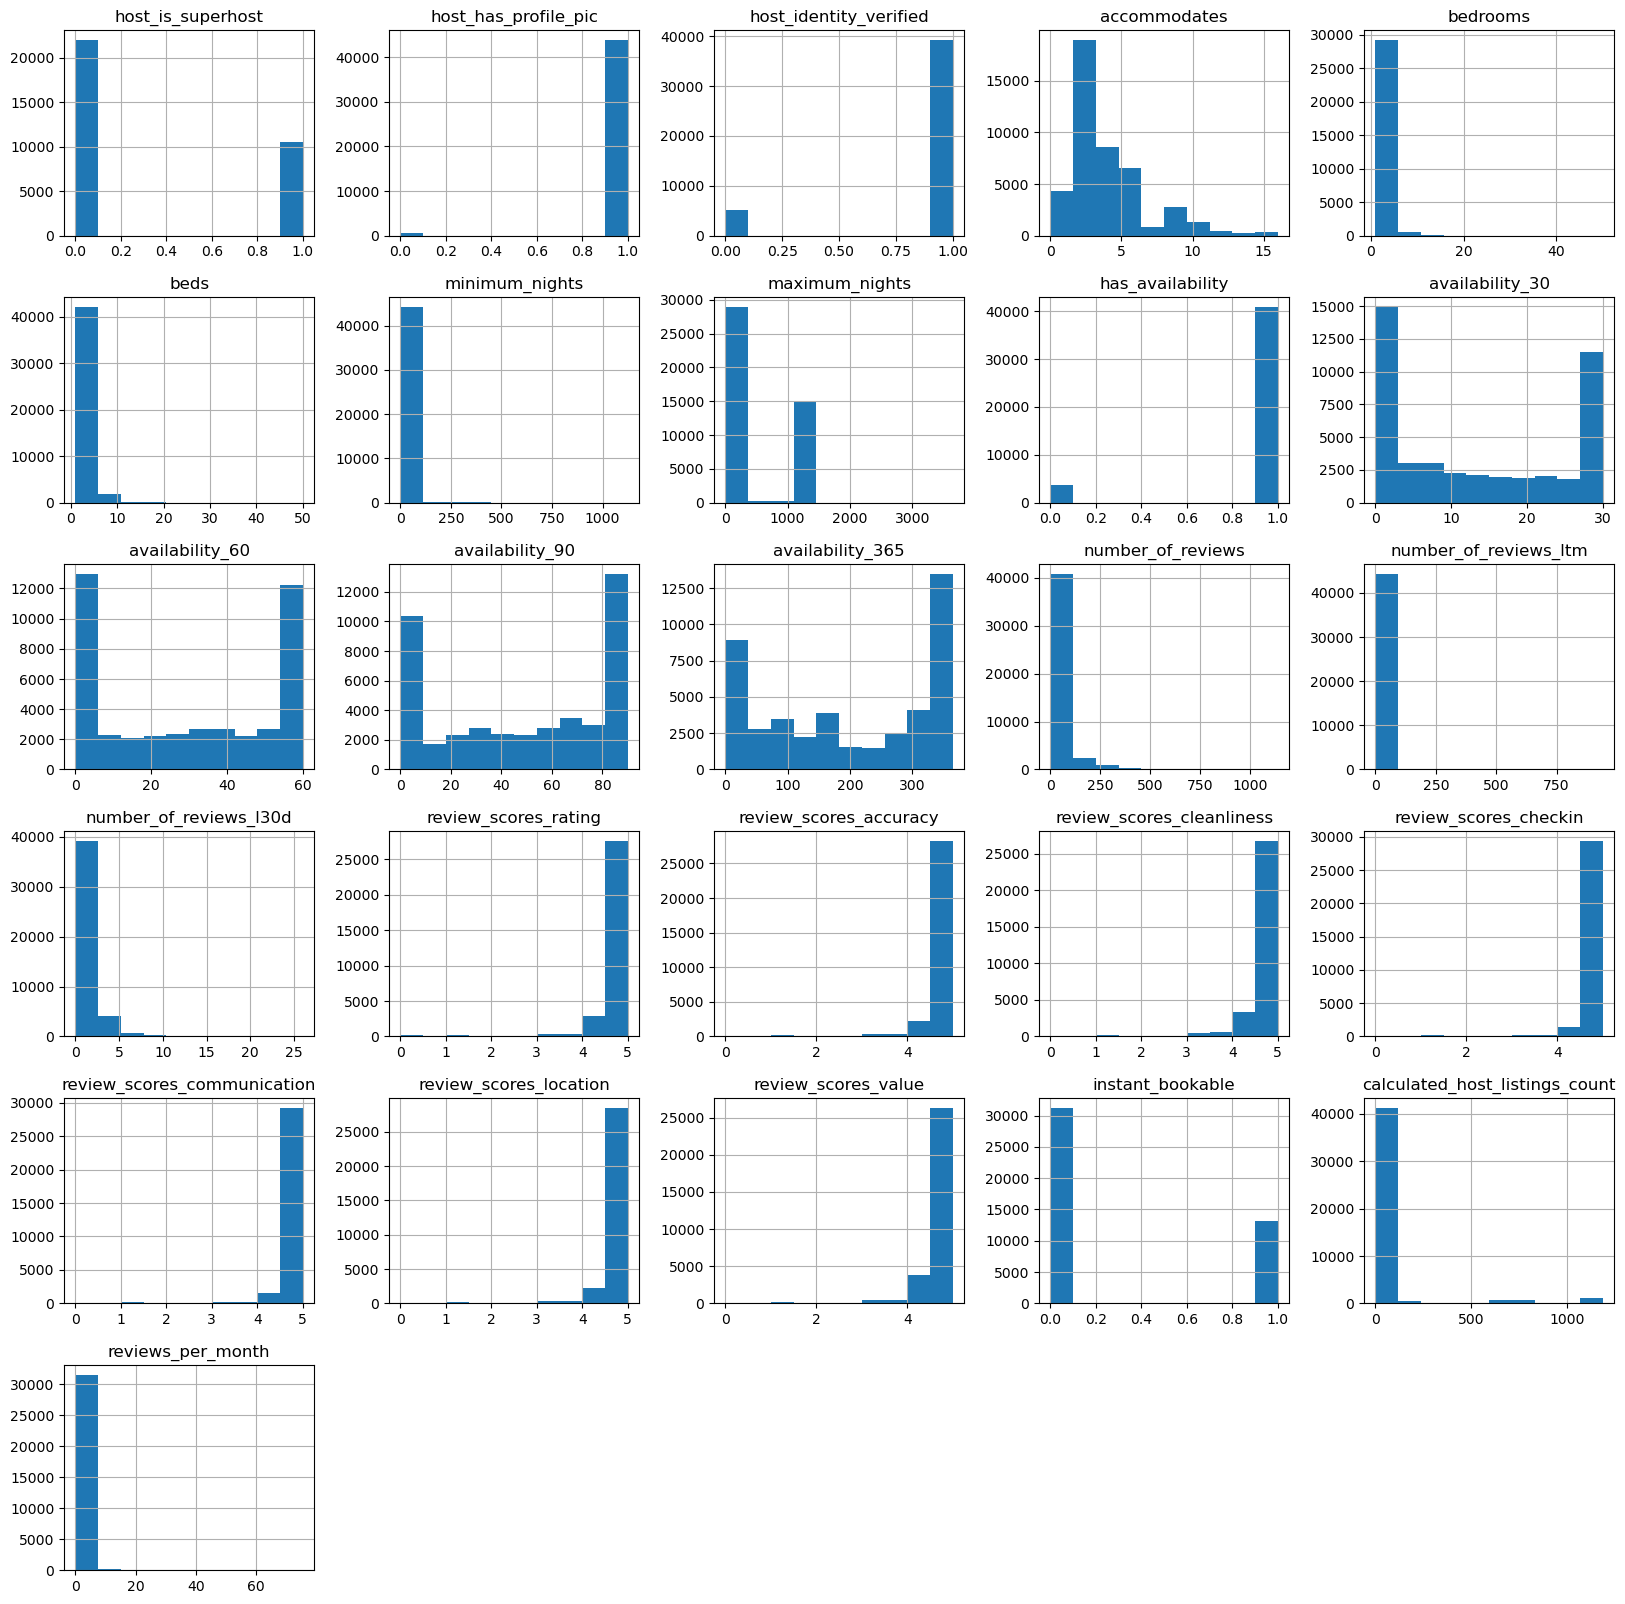

In [12]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [13]:
#print column names
for col in df.columns:
    print(col)  
    
#clean up individual columns

host_since
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_has_profile_pic
host_identity_verified
neighbourhood_cleansed
property_type
room_type
accommodates
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
has_availability
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
instant_bookable
calculated_host_listings_count
reviews_per_month


In [14]:
#fixing date datatypes 
df[['first_review', 'last_review', 'host_since']] = df[['first_review', 'last_review', 'host_since']].apply(pd.to_datetime)

In [15]:
#change price column from object to float and remove special characters
char_remove = {'$':'', ',':''}
for key, value in char_remove.items():
    df['price'] = df['price'].str.replace(key, value, regex=True)
    
df['price'] = df['price'].astype('float')

In [16]:
#host since

df['host_days_active'] = (datetime(2023, 4, 6) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 2154.0
Median days as host: 2279.0


In [17]:
#dropping host since, because now we have host days active feature
df.drop(['host_since'], axis=1, inplace=True)

In [18]:
df.host_response_time.isna().sum()

9975

In [19]:
df.host_response_time.fillna("unknown", inplace=True)
df['host_response_time'].value_counts()

within an hour        25894
unknown                9975
within a few hours     5697
within a day           2233
a few days or more      665
Name: host_response_time, dtype: int64

In [20]:
#host response rate
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

In [21]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       26870
unknown     9975
90-99%      3854
50-89%      2858
0-49%        907
Name: host_response_rate, dtype: int64

In [22]:
#host acceptance rate
df.host_acceptance_rate = df.host_acceptance_rate.str[:-1].astype('float64')

In [23]:
# Bin into four categories
df.host_acceptance_rate = pd.cut(df.host_acceptance_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_acceptance_rate = df.host_acceptance_rate.astype('str')

# Replace nulls with 'unknown'
df.host_acceptance_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_acceptance_rate.value_counts()

100%       14720
90-99%     11335
unknown     9423
50-89%      6751
0-49%       2235
Name: host_acceptance_rate, dtype: int64

In [24]:
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 100)
df.head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_days_active
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150097,within an hour,100%,100%,NaN,1.0,1.0,Valley Glen,Private room in bed and breakfast,Private room,3,1 private bath,NaN,2.0,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",80.0,31,120,1,0,0,0,122,216,0,0,2012-11-02,2020-11-29,4.96,4.95,4.96,4.99,4.99,4.90,4.95,0,4,1.67,4328.0
40667,within a day,100%,0-49%,NaN,1.0,0.0,Mid-City,Private room in rental unit,Private room,2,1.5 shared baths,NaN,2.0,"[""Smoke alarm"", ""Hot water"", ""Free street park...",59.0,30,180,1,30,60,90,365,12,0,0,2011-07-20,2018-08-24,4.30,3.82,3.73,4.82,4.64,4.36,4.45,0,1,0.08,4643.0
109,within a few hours,100%,0-49%,0.0,1.0,1.0,Culver City,Entire condo,Entire home/apt,6,2 baths,2.0,2.0,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",129.0,30,730,1,3,3,3,3,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0,1,0.01,5396.0


In [25]:
#host is superhost 
df['host_is_superhost'].isna().sum()

11881

In [26]:
#host has profile pic
df['host_has_profile_pic'].isna().sum()

2

In [27]:
#host identity verified 
df['host_identity_verified'].isna().sum()

2

In [28]:
#no null values in one of our important features
df['neighbourhood_cleansed'].isna().sum()

0

In [29]:
#compare property type vs. room type
df.property_type.value_counts()

Entire rental unit             10985
Entire home                    10318
Private room in home            7388
Entire guesthouse               2428
Private room in rental unit     2231
                               ...  
Entire resort                      1
Entire chalet                      1
Private room in dome               1
Room in bed and breakfast          1
Houseboat                          1
Name: property_type, Length: 107, dtype: int64

In [30]:
#drop property type since it is repetitive and has too many unique values 
df['room_type'].value_counts()

Entire home/apt    31023
Private room       12623
Shared room          740
Hotel room            78
Name: room_type, dtype: int64

In [31]:
df.drop(['property_type'], axis=1, inplace=True)

In [32]:
df['accommodates'].isna().sum()

0

In [33]:
df['bathrooms_text'].isna().sum()

29

In [34]:
#how should i handle this feature?
df['bathrooms_text'].unique()

array(['1 private bath', '1.5 shared baths', '2 baths', '1 bath',
       '11 shared baths', '1 shared bath', '2.5 baths', '3 baths', nan,
       '1.5 baths', '2 shared baths', '8 shared baths', '8 baths',
       '8.5 shared baths', '3.5 baths', '4 baths', '0 baths', '4.5 baths',
       '2.5 shared baths', '3.5 shared baths', 'Half-bath', '5 baths',
       '3 shared baths', '11.5 shared baths', '4.5 shared baths',
       '7.5 baths', '5.5 baths', '0 shared baths', 'Shared half-bath',
       '8.5 baths', '6.5 baths', '5 shared baths', '6 baths', '9 baths',
       '7 baths', '4 shared baths', '12.5 baths', '10 baths', '9.5 baths',
       '12 baths', 'Private half-bath', '11.5 baths', '13 baths',
       '11 baths', '5.5 shared baths', '13.5 baths', '10.5 baths',
       '21 baths', '20 baths', '15 baths', '10 shared baths',
       '6 shared baths', '16 baths', '17 baths', '27 baths', '42 baths',
       '7 shared baths', '46 baths'], dtype=object)

In [35]:
df['bedrooms'].isna().sum()

14752

In [36]:
for col in ['bedrooms']:
    df[col].fillna(df[col].median(), inplace=True)

In [37]:
df['beds'].isna().sum()

552

In [38]:
for col in ['beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [39]:
df['first_review'].max()

Timestamp('2023-06-06 00:00:00')

In [40]:
#first review 
df['days_since_firstreview'] = (datetime(2023, 4, 6) - df.first_review).astype('timedelta64[D]')

# Printing mean and median
print("Mean days since first review:", round(df['days_since_firstreview'].mean(),0))
print("Median days since first review:", df['days_since_firstreview'].median())

df.days_since_firstreview.fillna(df.days_since_firstreview.median(), inplace=True)

Mean days since first review: 1069.0
Median days since first review: 718.0


In [41]:
#last review 
df['days_since_lastreview'] = (datetime(2023, 4, 6) - df.last_review).astype('timedelta64[D]')

# Printing mean and median
print("Mean days since last review:", round(df['days_since_lastreview'].mean(),0))
print("Median days since last review:", df['days_since_lastreview'].median())

df.days_since_lastreview.fillna(df.days_since_lastreview.median(), inplace=True)

Mean days since last review: 303.0
Median days since last review: 1.0


In [42]:
df['last_review'].isna().sum()

12689

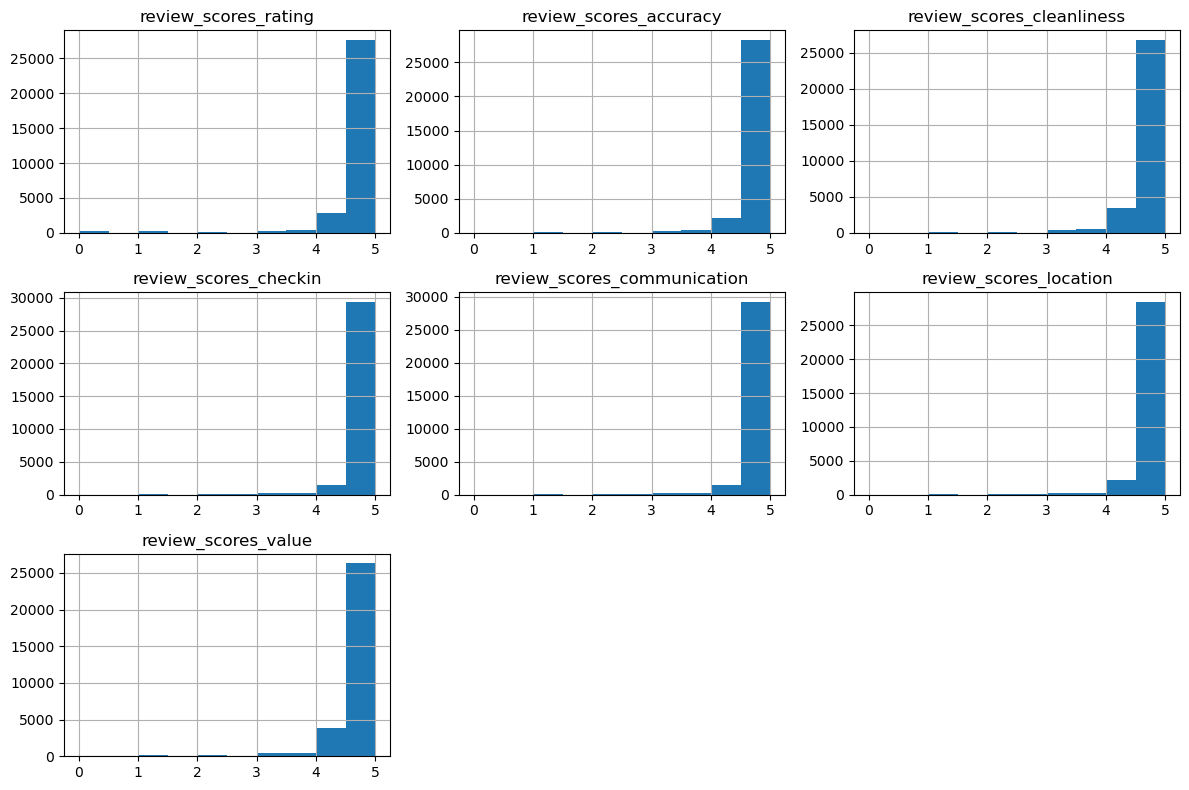

In [43]:
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [44]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

In [45]:
df.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month'], axis=1, inplace=True)

In [46]:
df['instant_bookable'].isna().sum()

0

In [47]:
df['calculated_host_listings_count'].isna().sum()

0

In [48]:
#Distribution of price by neighborhood

neighborhood_price_means = df.groupby(by='neighbourhood_cleansed')['price'].mean()
neighborhood_price_means.head(10)

neighbourhood_cleansed
Acton              199.833333
Adams-Normandie    105.205882
Agoura Hills       310.369231
Agua Dulce         292.560000
Alhambra           185.526839
Alondra Park       234.470588
Altadena           215.545082
Angeles Crest      223.400000
Arcadia            167.822335
Arleta             344.777778
Name: price, dtype: float64

In [54]:
#check for price outliers...there are some that may be outliers but we will filter them out
df['price'].sort_values(ascending=False).head(20)
df['price'] = df['price'] < 50000

In [50]:
#check to see how many listings have pricing over $1000/night. Are some of these outliers, or priced incorrectly?
df.loc[df.price > 10000]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_days_active,days_since_firstreview,days_since_lastreview
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20470689,within a few hours,50-89%,50-89%,0.0,1.0,1.0,Beverly Hills,Entire home/apt,16,8.5 baths,8.0,8.0,"[""Central air conditioning"", ""Dishwasher"", ""Su...",15790.0,3,1125,1,83,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,53,3072.0,718.0,1.0
20471072,within a few hours,50-89%,50-89%,0.0,1.0,1.0,Bel-Air,Entire home/apt,16,12.5 baths,9.0,10.0,"[""Shuffleboard"", ""Central air conditioning"", ""...",21053.0,30,1125,1,89,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,53,3072.0,718.0,1.0
20470251,within a few hours,50-89%,50-89%,0.0,1.0,1.0,Beverly Hills,Entire home/apt,14,8.5 baths,6.0,6.0,"[""TV with DVD player, Apple TV, premium cable""...",12500.0,7,365,1,4,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,53,3072.0,718.0,1.0
20471472,within a few hours,100%,50-89%,NaN,1.0,1.0,Hollywood Hills West,Entire home/apt,12,6.5 baths,6.0,6.0,"[""Central air conditioning"", ""Game room"", ""Dis...",12000.0,30,365,1,89,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14,1822.0,718.0,1.0
20471591,within a few hours,50-89%,50-89%,0.0,1.0,1.0,Beverly Hills,Entire home/apt,14,8.5 baths,6.0,6.0,"[""Central air conditioning"", ""Dishwasher"", ""Fi...",11000.0,30,1125,1,89,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,53,3072.0,718.0,1.0
24770890,within an hour,100%,90-99%,1.0,1.0,1.0,Unincorporated Santa Monica Mountains,Entire home/apt,16,8.5 baths,10.0,8.0,"[""Smoke alarm"", ""Hot water"", ""Dishwasher"", ""Fr...",16500.0,4,31,1,90,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,57,3050.0,718.0,1.0
25870451,unknown,unknown,50-89%,NaN,1.0,1.0,Unincorporated Santa Monica Mountains,Entire home/apt,16,8.5 baths,8.0,7.0,"[""Dishwasher"", ""Sun loungers"", ""Breakfast bar""...",18956.0,4,1125,1,89,1,2020-09-27,2020-09-27,5.00,NaN,NaN,NaN,NaN,NaN,NaN,0,21,1745.0,921.0,921.0
25870842,unknown,unknown,0-49%,NaN,0.0,0.0,Beverly Hills,Entire home/apt,12,12 baths,7.0,7.0,"[""Coffee maker: espresso machine, Nespresso"", ...",12750.0,3,1125,1,81,3,2018-09-19,2022-09-06,5.00,5.00,5.00,5.00,5.0,5.00,5.00,0,2,3185.0,1660.0,212.0
34309250,within a few hours,50-89%,50-89%,0.0,1.0,1.0,Bel-Air,Entire home/apt,16,13 baths,8.0,11.0,"[""Shuffleboard"", ""Toaster"", ""Central air condi...",15000.0,30,1125,1,89,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,53,3072.0,718.0,1.0


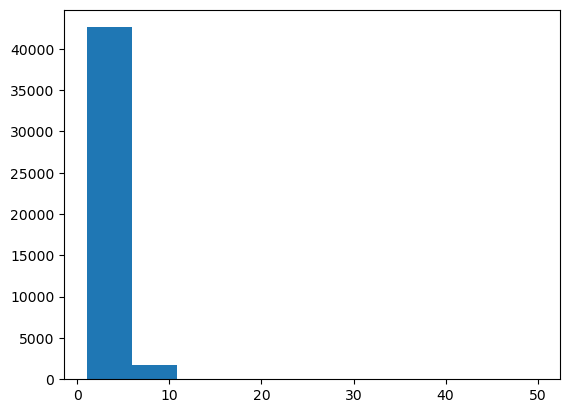

In [51]:
#show distribution of number of beds per listing
plt.hist(df['beds'])
plt.show()

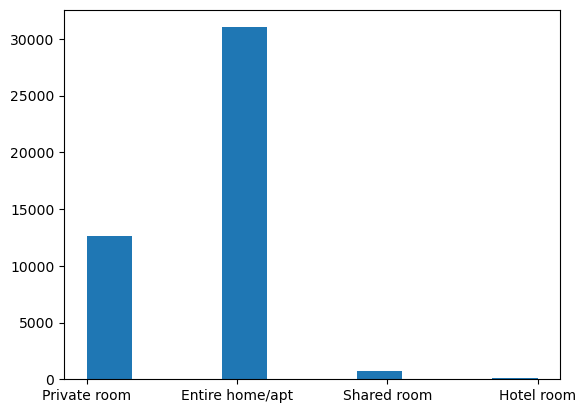

In [52]:
#show distribution of room types
plt.hist(df['room_type'])
plt.show()

In [53]:
neighborhood_group = df.groupby('neighbourhood_cleansed', as_index=False).count()
neighborhood_group

,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_days_active,days_since_firstreview,days_since_lastreview
0,Acton,12,12,12,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,8,8,8,8,8,8,8,8,8,12,12,12,12,12
1,Adams-Normandie,34,34,34,17,34,34,34,34,34,34,34,34,34,34,34,34,34,34,26,26,26,26,26,26,26,26,26,34,34,34,34,34
2,Agoura Hills,65,65,65,40,65,65,65,65,65,65,65,65,65,65,65,65,65,65,51,51,51,51,51,51,51,51,51,65,65,65,65,65
3,Agua Dulce,25,25,25,13,25,25,25,25,25,25,25,25,25,25,25,25,25,25,16,16,16,16,16,16,16,16,16,25,25,25,25,25
4,Alhambra,503,503,503,298,503,503,503,503,503,503,503,503,503,503,503,503,503,503,446,446,446,443,443,443,443,443,443,503,503,503,503,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Willowbrook,35,35,35,16,35,35,35,35,35,35,35,35,35,35,35,35,35,35,32,32,32,32,32,32,32,32,32,35,35,35,35,35
261,Wilmington,11,11,11,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,7,7,7,7,7,7,7,7,7,11,11,11,11,11
262,Windsor Square,31,31,31,21,31,31,31,31,31,31,31,31,31,31,31,31,31,31,25,25,25,24,24,24,24,24,24,31,31,31,31,31
263,Winnetka,103,103,103,57,103,103,103,103,103,103,103,103,103,103,103,103,103,103,83,83,83,82,82,82,82,82,82,103,103,103,103,103
